# **Chapter6**

## **9.**

In [ ]:
cd /content/drive/MyDrive/MAS456_컴퓨터통계방법론/

/content/drive/MyDrive/MAS456_컴퓨터통계방법론


### **Library**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('./College.csv', index_col='Unnamed: 0')

In [ ]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.loc[:, ~df.columns.isin(['Apps'])].head()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
Abilene Christian University,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
Adelphi University,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
Adrian College,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
Agnes Scott College,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
Alaska Pacific University,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [ ]:
df.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private_No', 'Private_Yes'],
      dtype='object')

### **(a)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np.array(df.loc[:, ~df.columns.isin(['Apps'])]),
    np.array(df.loc[:, 'Apps']),
    random_state=0
)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

582
195
582
195


### **(b)**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# print Test MSE
print(np.mean(((lr.predict(x_test)-y_test)**2)))
print(lr.score(x_test, y_test))

1022430.0889255599
0.9002392990734506


### **(c)**

In [ ]:
alpha_cands = np.linspace(.01, 100, 1000)

rcv = RidgeCV(alphas=alpha_cands,  cv=10)
rcv.fit(x_train, y_train)

print(np.mean(((rcv.predict(x_test)-y_test)**2)))
print(rcv.score(x_test, y_test))

1018023.2320525252
0.9006692855686631


In [ ]:
print('optimal alpha:', rcv.alpha_)

optimal alpha: 39.3454054054054


### **(d)**

In [ ]:
alpha_cands = np.linspace(.01, 100, 1000)

lcv = LassoCV(alphas=alpha_cands,  cv=10)
lcv.fit(x_train, y_train)

print(np.mean(((lcv.predict(x_test)-y_test)**2)))
print(lcv.score(x_test, y_test))

1017878.7762435534
0.9006833804323726


In [ ]:
print('optimal alpha:', lcv.alpha_)
print('number of non-zero features: {0} (out of {1}): '\
      .format(len([item for item in lcv.coef_ if item !=0]), x_test.shape[1]))

optimal alpha: 14.623153153153151
number of non-zero features: 16 (out of 18): 


### **(g)**

In [ ]:
lr_test_mse = np.mean(((lr.predict(x_test)-y_test)**2))
rcv_test_mse = np.mean(((rcv.predict(x_test)-y_test)**2))
lcv_test_mse = np.mean(((lcv.predict(x_test)-y_test)**2))

In [ ]:
print(lr_test_mse, rcv_test_mse, lcv_test_mse)

1022430.0889255599 1018023.2320525252 1017878.7762435534


Text(0.5, 0, 'Approach')

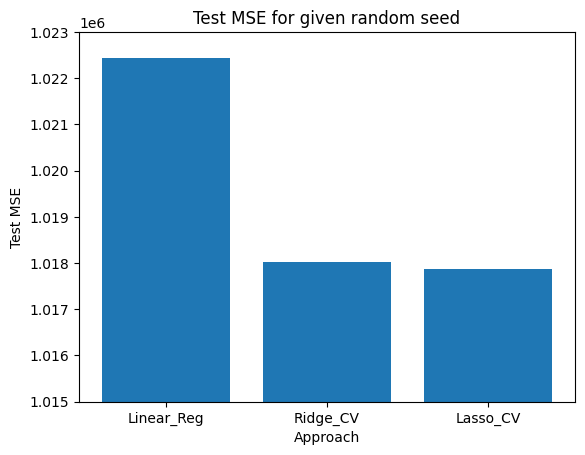

In [ ]:
plt.bar(['Linear_Reg', 'Ridge_CV', 'Lasso_CV'], [lr_test_mse, rcv_test_mse, lcv_test_mse])
plt.title('Test MSE for given random seed')
plt.ylabel('Test MSE')
plt.ylim(1015000, 1023000)
plt.xlabel('Approach')

## **10.**

### **Library**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **(a)**

In [5]:
np.random.seed(0)

# Dataframe with random numbers and the specified dimensions
n = 1000
p = 20
X = pd.DataFrame(np.random.normal(size=(n, p)))

# Epsilon
epsilon = np.random.normal(size=n)

# Coefficient b1
b1 = [5, 4, 3, 2, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Final expression
# y must be a vector with 1000 rows.
y = np.dot(X, b1) + epsilon


### **(b)**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .9)

In [7]:
len(X_test)

900

### **(c)**

In [ ]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# To solve the problem we will use exhaustive feature selection.
# This is a brute force solution but ensures the best subset selection.
# mlxtend package is used (link on References; pay attention to Example 2).
lr = LinearRegression()
train_mse = []
best_subset = []
for i in range(1,21):
    print(i)
    efs = EFS(lr,
              min_features = i,
              max_features = i,
              scoring = 'neg_mean_squared_error',
              print_progress = False,
              cv = 10)

    # .fit input should be array-like.
    # X_train is a dataframe so we use as_matrix() to convert it.
    efs.fit(X_train.values, y_train)
    train_mse.append(efs.best_score_ * (-1))
    best_subset.append(efs.best_idx_)

In [10]:
best_subset = [list(item) for item in best_subset]

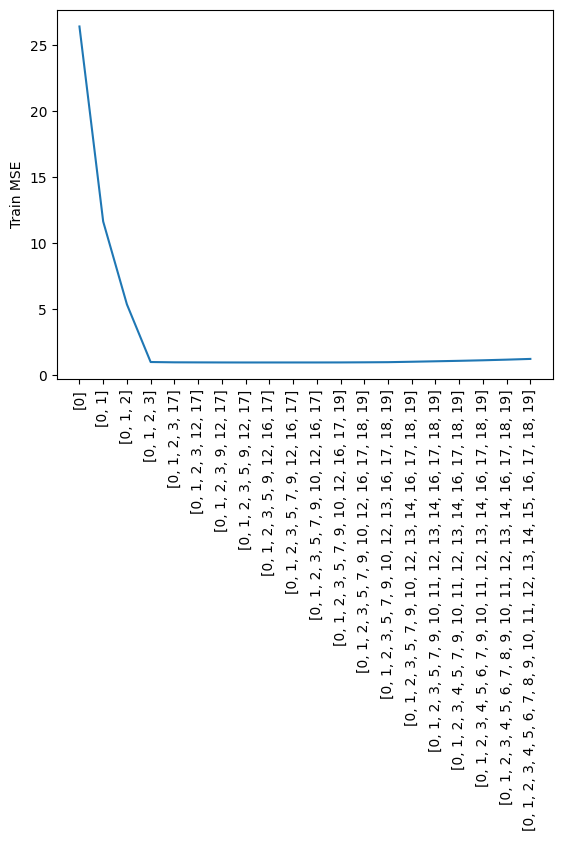

In [11]:
plt.plot(np.linspace(1, 20, 20), train_mse)
plt.xticks(np.linspace(1, 20, 20), labels=best_subset, rotation=90)
plt.ylabel('Train MSE')
plt.show()

### **(d)**

In [12]:
from tqdm import tqdm
test_mse = []
for i in tqdm(range(20)):
  target_subset = best_subset[i]
  lr = LinearRegression()
  lr.fit(X_train[target_subset], y_train)
  y_pred = lr.predict(X_test[target_subset])
  test_mse.append(np.mean((y_pred-y_test)**2))

100%|██████████| 20/20 [00:00<00:00, 146.74it/s]


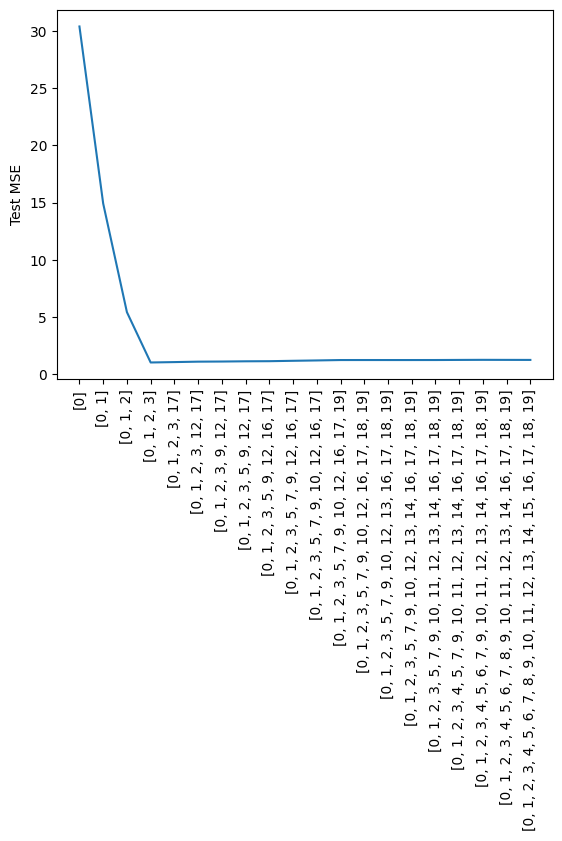

In [13]:
plt.plot(np.linspace(1, 20, 20), test_mse)
plt.xticks(np.linspace(1, 20, 20), labels=best_subset, rotation=90)
plt.ylabel('Test MSE')
plt.show()

### **(e)**

In [14]:
pd.Series(test_mse).idxmin()+1

4

### **(f)**

In [15]:
lr = LinearRegression()
lr.fit(X_train[best_subset[3]], y_train)
print('estimated', lr.coef_[1:])
print('true', b1)

estimated [3.89420905 2.9945604  2.0882942 ]
true [5, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **(g)**

In [16]:
from tqdm import tqdm
dist = []
for i in tqdm(range(20)):
  target_subset = best_subset[i]
  lr = LinearRegression()
  lr.fit(X_train[target_subset], y_train)
  betas = np.append(lr.coef_[1:], np.zeros(20-i))
  d = np.sqrt(np.sum((betas-b1)**2))
  dist.append(d)

100%|██████████| 20/20 [00:00<00:00, 237.72it/s]


Text(0.5, 0, 'index')

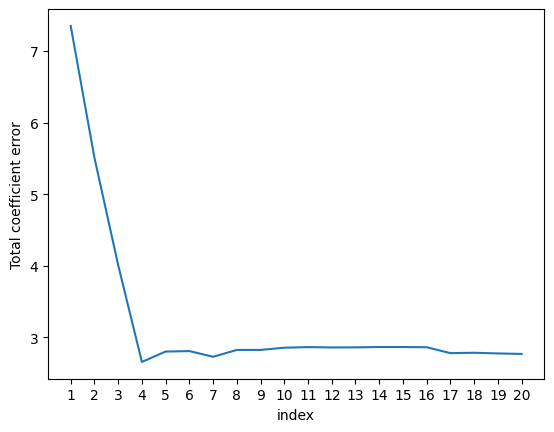

In [17]:
plt.plot(np.linspace(1, 20, 20), dist)
plt.xticks(np.linspace(1, 20, 20))
plt.ylabel('Total coefficient error')
plt.xlabel('index')

In [18]:
pd.Series(dist).idxmin()+1

4

# **Chapter7**

## **4.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

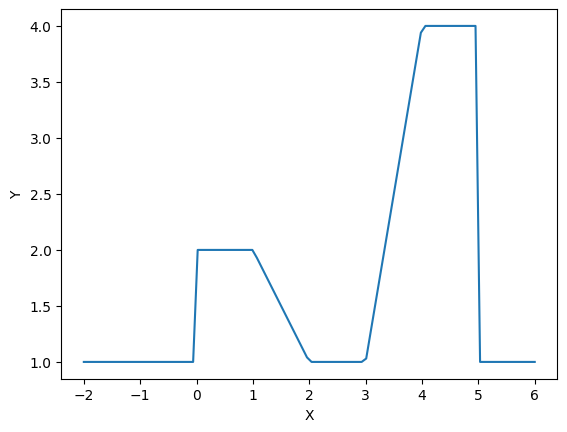

In [ ]:
X = np.linspace(-2, 6, 100)
b11 = np.array(list(map(lambda x: 1 if (x>=0 and x<=2) else 0, X)))
b12 = np.array(list(map(lambda x: x-1 if (x>=1 and x<=2) else 0, X)))
b1 = np.subtract(b11, b12)

b21 = np.array(list(map(lambda x: x-3 if (x>=3 and x<=4) else 0, X)))
b22 = np.array(list(map(lambda x: 1 if (x> 4 and x<=5) else 0, X)))
b2 = np.add(b21, b22)

Y = 1 + b1 + 3*b2

plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

## **Library**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## **10.**

In [ ]:
cd /content/drive/MyDrive/MAS456_컴퓨터통계방법론

/content/drive/MyDrive/MAS456_컴퓨터통계방법론


In [ ]:
df = pd.read_csv('./College.csv', index_col=0)

In [ ]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


### **(a)**

In [ ]:
print(df.shape)
print(df.columns)

(777, 19)
Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private_No', 'Private_Yes'],
      dtype='object')


In [ ]:
X = df.loc[:, df.columns != 'Outstate']
Y = df.loc[:, 'Outstate']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = .3, random_state=1
)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


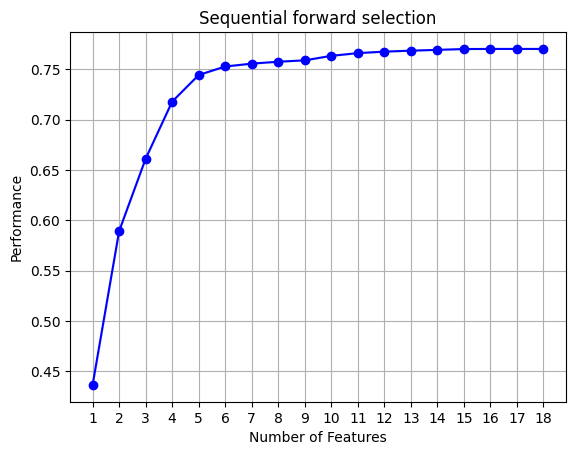

In [ ]:
lr = LinearRegression()

sfs = SFS(lr,
          k_features = 18,
          forward = True,
          floating = False,
          scoring = 'r2',
          cv = 0)

sfs = sfs.fit(X_train, Y_train)

fig = plot_sfs(sfs.get_metric_dict())
plt.title('Sequential forward selection')
plt.grid()
plt.show()

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)",[0.4362198079356785],0.43622,"(Room.Board,)",NaN,0.0,NaN
2,"(7, 13)",[0.5892065138987024],0.589207,"(Room.Board, perc.alumni)",NaN,0.0,NaN
3,"(7, 13, 14)",[0.66124161844549],0.661242,"(Room.Board, perc.alumni, Expend)",NaN,0.0,NaN
4,"(7, 13, 14, 16)",[0.7180472594803899],0.718047,"(Room.Board, perc.alumni, Expend, Private_No)",NaN,0.0,NaN
5,"(7, 10, 13, 14, 16)",[0.7445389170091502],0.744539,"(Room.Board, PhD, perc.alumni, Expend, Private...",NaN,0.0,NaN
6,"(7, 10, 13, 14, 15, 16)",[0.7529797180569529],0.75298,"(Room.Board, PhD, perc.alumni, Expend, Grad.Ra...",NaN,0.0,NaN
7,"(7, 9, 10, 13, 14, 15, 16)",[0.7558186916454233],0.755819,"(Room.Board, Personal, PhD, perc.alumni, Expen...",NaN,0.0,NaN
8,"(4, 7, 9, 10, 13, 14, 15, 16)",[0.7577507694491248],0.757751,"(Top25perc, Room.Board, Personal, PhD, perc.al...",NaN,0.0,NaN
9,"(1, 4, 7, 9, 10, 13, 14, 15, 16)",[0.7590884961181228],0.759088,"(Accept, Top25perc, Room.Board, Personal, PhD,...",NaN,0.0,NaN
10,"(0, 1, 4, 7, 9, 10, 13, 14, 15, 16)",[0.7635928325779913],0.763593,"(Apps, Accept, Top25perc, Room.Board, Personal...",NaN,0.0,NaN


In [ ]:
# with criteria of adjusted R^2
import statsmodels.api as sm

def forward_selection(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.rsquared_adj
        best_pval = new_pval.max()
        if len(best_features) == 0 or (best_pval > model.rsquared_adj):
            best_features.append(new_pval.idxmax())
        else:
            break
    return best_features

print(forward_selection(X_train, Y_train))

<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b5

['Room.Board', 'perc.alumni', 'Expend', 'Private_No', 'PhD', 'Grad.Rate', 'Personal', 'Top25perc', 'Accept', 'Apps', 'Enroll', 'Top10perc', 'S.F.Ratio', 'Terminal', 'Books']


<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-41-b560ca2fbbae>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [ ]:
# with criteria of Mallow's Cp
def forward_selection_cp(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    full_model = sm.OLS(target, sm.add_constant(data[initial_features])).fit()
    s2 = full_model.mse_resid
    n = len(data)

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        cp_values = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            p = len(best_features) + 1
            cp = model.ssr/s2 + 2*(p+1) - n
            cp_values[new_column] = cp

        best_cp = cp_values.min()
        if len(best_features) == 0 or (best_cp < cp_values.min()):
            best_features.append(cp_values.idxmin())
        else:
            break

    return best_features

print(forward_selection_cp(X_train, Y_train))

<ipython-input-42-3e1525d55243>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cp_values = pd.Series(index=remaining_features)


['Room.Board']


<ipython-input-42-3e1525d55243>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cp_values = pd.Series(index=remaining_features)


In [ ]:
# with criteria of AIC
def forward_selection_aic(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    current_aic = float('inf')  # start with a high AIC

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        aic_values = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            aic_values[new_column] = model.aic

        min_aic = aic_values.min()
        if min_aic < current_aic:
            current_aic = min_aic
            best_features.append(aic_values.idxmin())
        else:
            break

    return best_features

print(forward_selection_aic(X_train, Y_train))

<ipython-input-43-874995e8017e>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aic_values = pd.Series(index=remaining_features)
<ipython-input-43-874995e8017e>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aic_values = pd.Series(index=remaining_features)
<ipython-input-43-874995e8017e>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aic_values = pd.Series(index=remaining_features)
<ipython-input-43-874995e8017e>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aic_values = pd.Series(index=remaining_features)
<ipython-inp

['Room.Board', 'perc.alumni', 'Expend', 'Private_No', 'PhD', 'Grad.Rate', 'Personal', 'Top25perc', 'Accept', 'Apps', 'Enroll', 'Top10perc', 'S.F.Ratio']


<ipython-input-43-874995e8017e>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  aic_values = pd.Series(index=remaining_features)


**Based on scoring criteria (Adjusted $R^2$, Mallow's $C_p$, AIC), we obtained different best subset model**\\

But for the sake of simplicity, lets take simple model if performance improvement isn't that huge.

### **(b)**

In [ ]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

Found existing installation: numpy 1.26.1
Uninstalling numpy-1.26.1:
  Successfully uninstalled numpy-1.26.1
Found existing installation: setuptools 68.2.2
Uninstalling setuptools-68.2.2:
  Successfully uninstalled setuptools-68.2.2
  Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.2 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires numpy, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0

  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [ ]:
!pip uninstall pygam
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [ ]:
from pygam import LinearGAM, s

selected_features = ['Room.Board', 'perc.alumni', 'Expend', 'Private_No', 'PhD', 'Grad.Rate']
gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5))

gam.fit(X_train[selected_features], Y_train)
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.5653
Link Function:                     IdentityLink Log Likelihood:                                 -8679.2047
Number of Samples:                          543 AIC:                                            17467.5399
                                                AICc:                                           17479.9803
                                                GCV:                                          4232277.0771
                                                Scale:                                        3488086.0916
                                                Pseudo R-Squared:                                   0.8034
Feature Function                  Lam

<ipython-input-25-ae668f21cfea>:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


<Figure size 640x480 with 0 Axes>

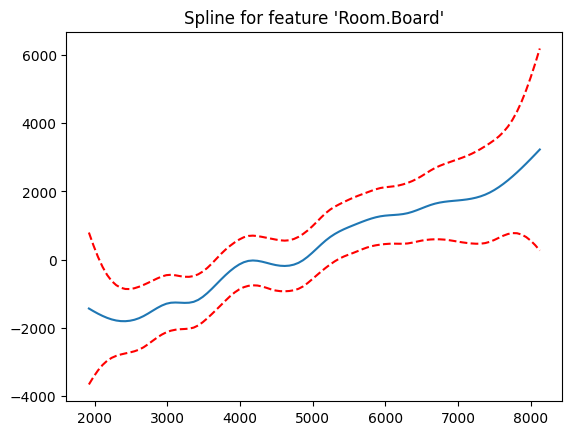

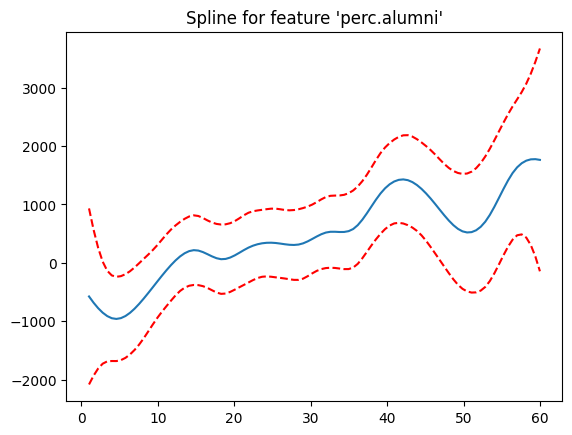

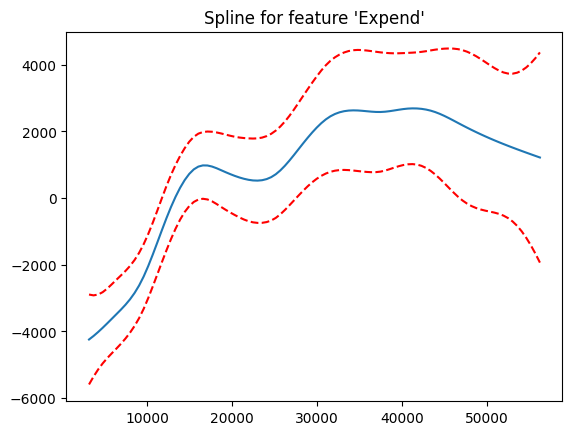

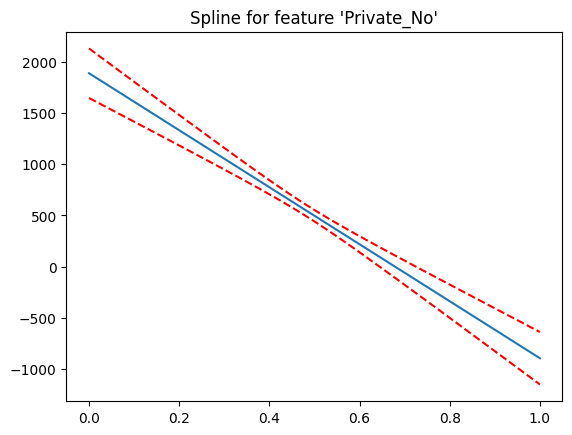

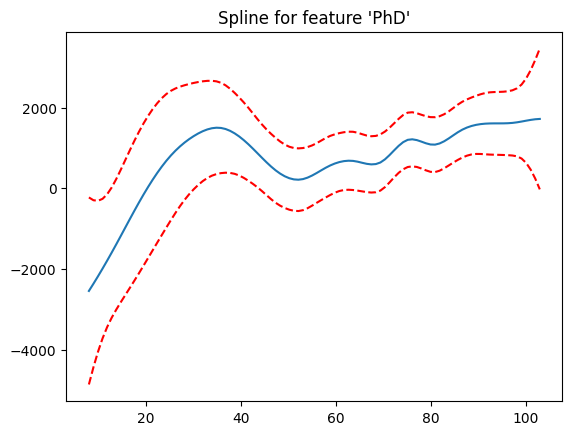

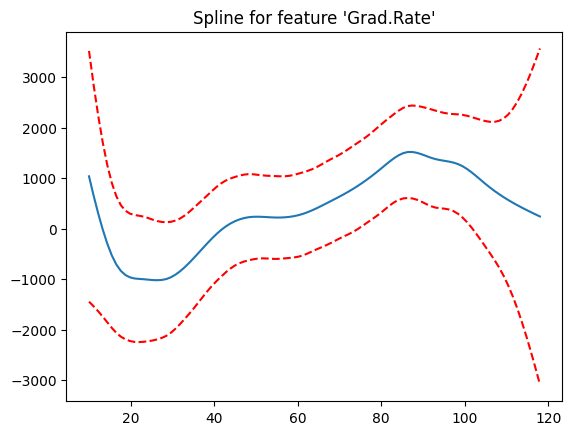

In [ ]:
gam.gridsearch(X_train, Y_train)

plt.figure();
titles = ['Room.Board', 'perc.alumni', 'Expend', 'Private_No', 'PhD', 'Grad.Rate']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title('Spline for feature {0}'.format(repr(titles[i])))
    plt.show()

### **(c)**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y_pred = gam.predict(X_test[selected_features])

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

Mean Squared Error on Test Set: 3481100.408144848
R^2 Score on Test Set: 0.79


### **(d)**

In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = l(0) + s(1) + s(2) + s(3) + s(4) + s(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.8537
Link Function:                     IdentityLink Log Likelihood:                                 -8677.0938
Number of Samples:                          543 AIC:                                             17443.895
                                                AICc:                                           17452.1691
                                                GCV:                                           4060177.066
                                                Scale:                                        3474552.3198
                                                Pseudo R-Squared:                                   0.8003
Feature Function                  Lam

<ipython-input-16-0a4462b60bc9>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = s(0) + l(1) + s(2) + s(3) + s(4) + s(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.3888
Link Function:                     IdentityLink Log Likelihood:                                 -8679.0704
Number of Samples:                          543 AIC:                                            17446.9184
                                                AICc:                                           17455.0161
                                                GCV:                                          4067776.4995
                                                Scale:                                        3487223.2668
                                                Pseudo R-Squared:                                   0.7994
Feature Function                  Lam

<ipython-input-17-25a8bbae5161>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = s(0) + s(1) + l(2) + s(3) + s(4) + s(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     46.2667
Link Function:                     IdentityLink Log Likelihood:                                 -8742.6334
Number of Samples:                          543 AIC:                                            17579.8001
                                                AICc:                                           17589.0229
                                                GCV:                                          4623527.2501
                                                Scale:                                        3920286.4574
                                                Pseudo R-Squared:                                   0.7757
Feature Function                  Lam

<ipython-input-18-03e2199e1632>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = s(0) + s(1) + s(2) + l(3) + s(4) + s(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.5549
Link Function:                     IdentityLink Log Likelihood:                                 -8679.2203
Number of Samples:                          543 AIC:                                            17467.5504
                                                AICc:                                           17479.9858
                                                GCV:                                          4232225.5771
                                                Scale:                                        3488186.1667
                                                Pseudo R-Squared:                                   0.8034
Feature Function                  Lam

<ipython-input-19-a056ca36a8b1>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = s(0) + s(1) + s(2) + s(3) + l(4) + s(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.2196
Link Function:                     IdentityLink Log Likelihood:                                 -8684.7306
Number of Samples:                          543 AIC:                                            17459.9003
                                                AICc:                                           17468.3146
                                                GCV:                                          4123430.4265
                                                Scale:                                        3523764.0467
                                                Pseudo R-Squared:                                   0.7976
Feature Function                  Lam

<ipython-input-20-0bc56a9b1fe3>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l, s

# Define the model using smooth terms for all predictors
terms = s(0) + s(1) + s(2) + s(3) + s(4) + l(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

# Evaluate the model using Mean Squared Error
Y_pred = gam.predict(X_test[selected_features])
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the model using R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.4031
Link Function:                     IdentityLink Log Likelihood:                                 -8677.8968
Number of Samples:                          543 AIC:                                            17446.5997
                                                AICc:                                           17455.0849
                                                GCV:                                          4074714.4303
                                                Scale:                                        3479694.2682
                                                Pseudo R-Squared:                                   0.8002
Feature Function                  Lam

<ipython-input-27-553f1fd38160>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from pygam import LinearGAM, l

# Define the model using smooth terms for all predictors
terms = l(0) + l(1) + l(2) + l(3) + l(4) + l(5)
gam = LinearGAM(terms).fit(X_train[selected_features], Y_train)

# Print model summary
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.9913
Link Function:                     IdentityLink Log Likelihood:                                 -8753.7982
Number of Samples:                          543 AIC:                                            17523.5791
                                                AICc:                                           17523.8482
                                                GCV:                                          4096558.0644
                                                Scale:                                        4001727.4038
                                                Pseudo R-Squared:                                    0.753
Feature Function                  Lam

<ipython-input-22-b5217ca814f7>:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


## **11.**

### **(a)**

In [ ]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
eps = np.random.normal(size=100)
y = 16 + 5.1 * x1 - 7.3 * x2 + eps

###**(b)**

In [ ]:
beta0 = np.nan
beta1 = 1
beta2 = np.nan

print(beta0, beta1, beta2)

nan 1 nan



### **(c)**

In [ ]:
lr = LinearRegression()
lr.fit(x2.reshape(-1 ,1), (y-beta1*x1))

print(lr.coef_)
print(lr.intercept_)
beta2 = lr.coef_[0]

[-7.15994424]
15.99776872061943


### **(d)**

In [ ]:
lr = LinearRegression()
lr.fit(x1.reshape(-1, 1), y-beta2*x2)

print(lr.coef_)
print(lr.intercept_)
beta1 = lr.coef_[0]

[5.11046383]
15.987520004769923


### **(e)**

In [ ]:
from tqdm import tqdm

beta0_list = []
beta1_list = []
beta2_list = []

lr = LinearRegression()
for i in tqdm(range(1000)):
  lr.fit(x2.reshape(-1, 1), y-beta1*x1)
  beta2 = lr.coef_[0]

  lr.fit(x1.reshape(-1, 1), y-beta2*x2)
  beta1 = lr.coef_[0]

  beta0 = lr.intercept_
  beta0_list.append(beta0)
  beta1_list.append(beta1)
  beta2_list.append(beta2)

print(beta0, beta1, beta2)

100%|██████████| 1000/1000 [00:05<00:00, 173.83it/s]

15.999633643611695 5.114287788429456 -7.282065348875617


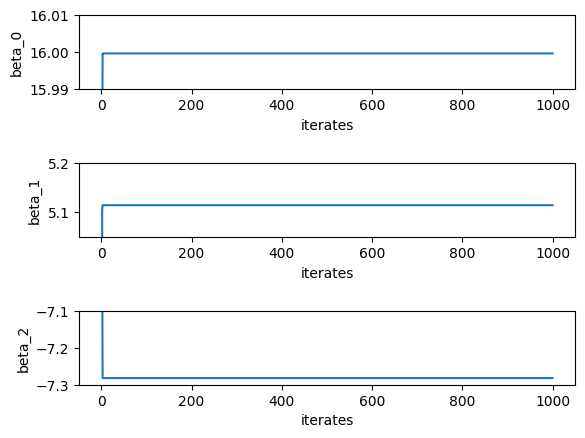

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(np.linspace(1, 1000, 1000), beta0_list)
plt.ylim(15.99, 16.01)
plt.xlabel('iterates')
plt.ylabel('beta_0')
plt.subplots_adjust(hspace=1)
plt.subplot(3, 1, 2)
plt.plot(np.linspace(1, 1000, 1000), beta1_list)
plt.ylim(5.05, 5.2)
plt.xlabel('iterates')
plt.ylabel('beta_1')
plt.subplots_adjust(hspace=1)
plt.subplot(3, 1, 3)
plt.plot(np.linspace(1, 1000, 1000), beta2_list)
plt.ylim(-7.3, -7.1)
plt.xlabel('iterates')
plt.ylabel('beta_2')
plt.subplots_adjust(hspace=1)

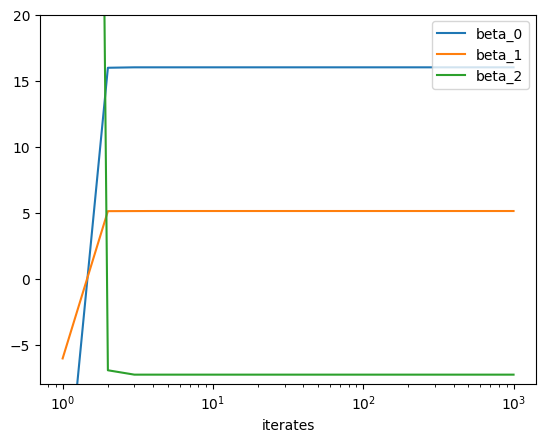

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(1, 1000, 1000), beta0_list, label='beta_0')
ax.plot(np.linspace(1, 1000, 1000), beta1_list, label='beta_1')
ax.plot(np.linspace(1, 1000, 1000), beta2_list, label='beta_2')
ax.set_xscale('log')
ax.set_xlabel('iterates')
ax.set_ylim(-8, 20)
ax.legend(loc='upper right')

### **(f)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y
})
print(df)

          x1        x2          y
0   0.025024 -0.443671  19.746200
1  -0.863748 -0.263181  15.698989
2   1.996266  0.981952  19.172009
3   1.091483 -2.519675  39.311031
4   1.697514 -1.401674  35.109564
..       ...       ...        ...
95 -0.930753  0.740580   6.278668
96  0.831986  1.317981  10.131456
97 -0.948773  1.095719   2.554087
98  0.819196 -0.035331  20.492226
99 -0.347870  0.159012  14.009756

[100 rows x 3 columns]


In [ ]:
reg = smf.ols('y ~ x1 + x2', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3905.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           2.01e-93
Time:                        04:42:05   Log-Likelihood:                -134.67
No. Observations:                 100   AIC:                             275.3
Df Residuals:                      97   BIC:                             283.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9996      0.095    168.485      0.000      15.811      16.188
x1             5.1143      0.101     50.584      0.000       4.914       5.315
x2            -7.2821      0.098    -73.978      0.000      -7.477      -7.087
==============================================================================
Omnibus:                        3.023   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.798
Skew:                           0.148   Prob(JB):                        0.247
Kurtosis:                       3.765   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

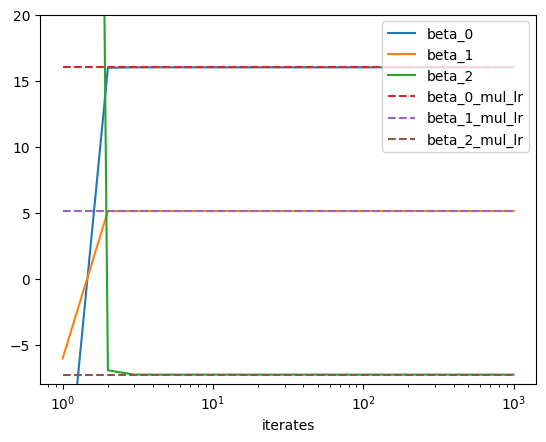

In [ ]:
beta_0_lr = reg.params[0]
beta_1_lr = reg.params[1]
beta_2_lr = reg.params[2]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(1, 1000, 1000), beta0_list, label='beta_0')
ax.plot(np.linspace(1, 1000, 1000), beta1_list, label='beta_1')
ax.plot(np.linspace(1, 1000, 1000), beta2_list, label='beta_2')
ax.plot(np.linspace(1, 1000, 1000), np.linspace(1, 1, 1000)*beta_0_lr, linestyle = '--', label='beta_0_mul_lr')
ax.plot(np.linspace(1, 1000, 1000), np.linspace(1, 1, 1000)*beta_1_lr, linestyle = '--', label='beta_1_mul_lr')
ax.plot(np.linspace(1, 1000, 1000), np.linspace(1, 1, 1000)*beta_2_lr, linestyle = '--', label='beta_2_mul_lr')
ax.set_xscale('log')
ax.set_xlabel('iterates')
ax.set_ylim(-8, 20)
ax.legend(loc='upper right')

### **(g)**

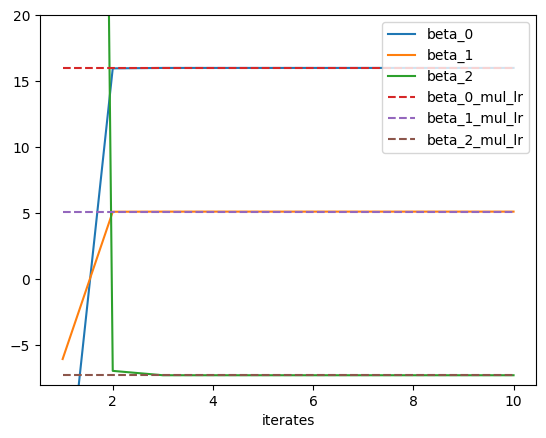

In [ ]:
beta_0_lr = reg.params[0]
beta_1_lr = reg.params[1]
beta_2_lr = reg.params[2]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(1, 10, 10), beta0_list[:10], label='beta_0')
ax.plot(np.linspace(1, 10, 10), beta1_list[:10], label='beta_1')
ax.plot(np.linspace(1, 10, 10), beta2_list[:10], label='beta_2')
ax.plot(np.linspace(1, 10, 10), np.linspace(1, 1, 10)*beta_0_lr, linestyle = '--', label='beta_0_mul_lr')
ax.plot(np.linspace(1, 10, 10), np.linspace(1, 1, 10)*beta_1_lr, linestyle = '--', label='beta_1_mul_lr')
ax.plot(np.linspace(1, 10, 10), np.linspace(1, 1, 10)*beta_2_lr, linestyle = '--', label='beta_2_mul_lr')
ax.set_ylim(-8, 20)
ax.set_xlabel('iterates')
ax.legend(loc='upper right')